In [126]:
import o3fire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
############################################
############ Load and clean data ###########
############################################

#load incomplete cleaned data
firex_df_incomplete = pd.read_csv('../../data/raw/firex_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_incomplete = pd.read_csv('../../data/raw/wecan_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
arctas_df_incomplete = pd.read_csv('../../data/raw/arctas_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_incomplete = pd.read_csv('../../data/raw/atom_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_60s_df_incomplete = pd.read_csv('../../data/raw/dc3_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')

#load complete cleaned data (missing value treatment)
firex_df_clean = pd.read_csv('../../data/gap_filled/firex_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_clean = pd.read_csv('../../data/gap_filled/wecan_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
arctas_df_clean = pd.read_csv('../../data/gap_filled/arctas_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_clean = pd.read_csv('../../data/gap_filled/atom_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_60s_df_clean = pd.read_csv('../../data/gap_filled/dc3_complete.csv', parse_dates=['timestamp'], index_col='timestamp')

# add WECAN NOy
wecan_df_incomplete['NOy'] = wecan_df_incomplete[['NO', 'NO2', 'PAN', 'PPN', 'HNO3', ]].sum(axis=1)
wecan_df_clean['NOy'] = wecan_df_clean[['NO', 'NO2', 'PAN', 'PPN', 'HNO3', ]].sum(axis=1)

# altitude correction - to meters
wecan_df_clean['altitude'] = wecan_df_clean['altitude']*1000 
arctas_df_clean['altitude'] = arctas_df_clean['altitude']*1000
dc3_60s_df_clean['altitude'] = dc3_60s_df_clean['altitude']*1000

wecan_df_incomplete['altitude'] = wecan_df_incomplete['altitude']*1000
arctas_df_incomplete['altitude'] = arctas_df_incomplete['altitude']*1000
dc3_60s_df_incomplete['altitude'] = dc3_60s_df_incomplete['altitude']*1000

#load units data
firex_units = pd.read_csv("../../data/units/FIREX_TOGAmerge_units.csv", index_col=False)
wecan_units = pd.read_csv("../../data/units/WECAN_TOGAmerge_units.csv", index_col=False)
arctas_units = pd.read_csv("../../data/units/ARCTAS_TOGAmerge_units.csv", index_col=False)
atom_units = pd.read_csv("../../data/units/ATOM_TOGAmerge_units.csv", index_col=False)
dc3_units = pd.read_csv("../../data/units/DC3_TOGAmerge_units.csv", index_col=False)
dc3_60s_units = pd.read_csv("../../data/units/DC3_units.csv", index_col=False)

#load final measurement data
firex_measurements_df = pd.read_csv('../../data/final_measurement_lists/final_firex_measurement_list.csv')
wecan_measurements_df = pd.read_csv('../../data/final_measurement_lists/final_wecan_measurement_list.csv')
dc3_60s_measurements_df = pd.read_csv('../../data/final_measurement_lists/final_dc3_60s_measurement_list.csv')
arctas_measurements_df = pd.read_csv('../../data/final_measurement_lists/final_arctas_measurement_list.csv')
atom_measurements_df = pd.read_csv('../../data/final_measurement_lists/final_atom_measurement_list.csv')

#remove stratospheric influence
firex_df_clean = firex_df_clean[((firex_df_clean['O3'] / firex_df_clean['H2O'])<1) & ((firex_df_clean['O3'] / firex_df_clean['H2O'])>0.003)]
atom_df_clean = atom_df_clean[((atom_df_clean['O3'] / atom_df_clean['H2O'])<1) & ((atom_df_clean['O3'] / atom_df_clean['H2O'])>0.003)]
wecan_df_clean = wecan_df_clean[((wecan_df_clean['O3'] / wecan_df_clean['H2O'])<1) & ((wecan_df_clean['O3'] / wecan_df_clean['H2O'])>0.003)]
arctas_df_clean = arctas_df_clean[((arctas_df_clean['O3'] / arctas_df_clean['H2O'])<1) & ((arctas_df_clean['O3'] / arctas_df_clean['H2O'])>0.003)]
dc3_60s_df_clean = dc3_60s_df_clean[((dc3_60s_df_clean['O3'] / dc3_60s_df_clean['H2O'])<1) & ((dc3_60s_df_clean['O3'] / dc3_60s_df_clean['H2O'])>0.003)]

#firex temperature correction
firex_df_clean['temperature'] = firex_df_clean['temp']+273.15

In [128]:
arctas_df_clean_old = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/arctas_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
firex_df_clean_old = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/firex_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
# stratospheric influence
firex_df_clean_old = firex_df_clean_old[((firex_df_clean_old['O3'] / firex_df_clean_old['H2O'])<1) & ((firex_df_clean_old['O3'] / firex_df_clean_old['H2O'])>0.003)]
arctas_df_clean_old = arctas_df_clean_old[((arctas_df_clean_old['O3'] / arctas_df_clean_old['H2O'])<1) & ((arctas_df_clean_old['O3'] / arctas_df_clean_old['H2O'])>0.003)]

In [129]:
len(firex_df_clean), len(firex_df_clean_old)

(3779, 3779)

In [130]:
len(arctas_df_clean), len(arctas_df_clean_old)

(3623, 3623)

In [131]:
# ATom Seasonality -- keep only spring and summer months
def get_season(month, lat):
    s_and_s_months = [4,5,6,7,8,9]
    f_and_w_months = [1,2,3,10,11,12]
        
    if month in s_and_s_months:
        if lat < 0:
            return 'F&W'
        else:
            return 'S&S'
    else:
        if lat < 0:
            return 'S&S'
        else:
            return 'F&W'
        
atom_df_clean['season'] = atom_df_clean.reset_index().apply((lambda x: get_season(x['timestamp'].month, x['lat'])), axis=1).to_numpy()
# drop F&W
atom_df_clean = atom_df_clean[atom_df_clean['season'] == 'S&S']

In [132]:
### Combine campaigns

# Combine dataframes
firex_df_clean['campaign'] = 'FIREX'
wecan_df_clean['campaign'] = 'WECAN'
atom_df_clean['campaign'] = 'ATom'
arctas_df_clean['campaign'] = 'ARCTAS'
# arctas_df_clean_old['campaign'] = 'ARCTAS'
dc3_60s_df_clean['campaign'] = 'DC3'

measurements_df_dict = {'FIREX': firex_measurements_df,
                 'WECAN': wecan_measurements_df,
                 'ATom': atom_measurements_df,
                 'ARCTAS': arctas_measurements_df,
                 'DC3': dc3_60s_measurements_df,}
units_df_dict = {'FIREX': firex_units,
                 'WECAN': wecan_units,
                 'ATom': atom_units,
                 'ARCTAS': arctas_units,
                 'DC3': dc3_60s_units,}

full_df = pd.concat([firex_df_clean, wecan_df_clean, atom_df_clean, arctas_df_clean, dc3_60s_df_clean])
# full_df = pd.concat([firex_df_clean, wecan_df_clean, atom_df_clean, arctas_df_clean_old, dc3_60s_df_clean])

In [133]:
full_df[full_df['campaign'] == 'ARCTAS']

,lat,long,altitude,jNO2,jO3,pressure,temperature,wind_speed,wind_direction,OA_AMS,...,H2SO4,Cl,Br,CCl4,HNO4,CH3OOH,IEPOX,ISOPOOH,MeCycPentane,bPinene
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-04-01 20:19:38.000,41.6708,226.516,7650.57,0.014955,0.000039,373.545,233.833,5.13887,350.3000,0.014872,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01 20:21:38.000,41.8162,226.251,6755.67,0.014541,0.000038,425.027,240.785,4.19377,29.8901,0.221637,...,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01 20:23:38.000,41.9610,225.984,5835.73,0.015910,0.000040,483.212,247.713,6.13420,70.5619,0.362741,...,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01 20:25:38.000,42.1060,225.715,4929.86,0.015069,0.000039,546.685,254.592,6.76463,75.5057,0.047508,...,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01 20:27:38.000,42.2463,225.452,4009.03,0.014545,0.000038,617.627,261.385,8.04794,100.3200,0.088047,...,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-07-13 22:33:36.500,34.1261,240.876,3527.61,0.010419,0.000043,667.586,279.104,2.83434,66.1348,NaN,...,516150.0,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-13 22:35:36.500,34.0741,241.117,3514.70,0.010040,0.000042,668.780,279.324,3.87739,62.6705,NaN,...,587282.0,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-13 22:37:36.500,34.0496,241.321,3245.48,0.009844,0.000040,690.951,281.004,3.28598,45.4542,NaN,...,437596.0,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# correct units -- convert everything to ppt
columns = full_df.columns.to_list()
columns.remove('campaign')
columns.remove('lat')
columns.remove('long')
grouped_full_df = full_df.groupby('campaign')

print("Columns that couldn't be unit corrected:")
print()

for col in columns:
    #set everything to ppt
    target_unit = 'ppt'
    for i, (campaign, group) in enumerate(grouped_full_df):
        column_used = measurements_df_dict[campaign].loc[(measurements_df_dict[campaign]['Core_Name'] == col), 'Column_Name'].values
        if len(column_used)>0:
            try:
                unit = units_df_dict[campaign][column_used[0]].values[0] 
                if unit == 'missing':
                    unit = 'ppb'
                full_df.loc[(full_df['campaign']==campaign), col] = full_df.loc[(full_df['campaign']==campaign), col]*o3fire.utils.unit_conversion_ppx(unit, target_unit)
            except:
                print(campaign, col, column_used)
        else:
            pass

Columns that couldn't be unit corrected:

ATom ClNO2 ['ClNO2_NOAACIMS']
ATom PPN ['PPN_GTCIMS']
ATom PBN ['PBN_GTCIMS']
ATom SO2 ['SO2_LIF']
ATom Cl2 ['Cl2_NOAACIMS']
ATom BrO ['BrO_NOAACIMS']
ATom H ['HCOOH_NOAACIMS']
FIREX MEK ['0.85']
FIREX Butanal ['0.01']
FIREX x2MeFuran ['0.85']
FIREX x3MeFuran ['0.15']
ATom Br2 ['Bromine_prec_PM1_AMS']
ATom I2 ['Iodine_prec_PM1_AMS']
ATom BrCN ['BrCN_NOAACIMS']
ATom BrCl ['BrCl_NOAACIMS']
ATom C2H4O3S ['C2H4O3S_ppt_NOAACIMS']
ATom N2O5 ['N2O5_ppt_NOAACIMS']


In [135]:
# derive extra columns
full_df['NOx'] = full_df['NO']+full_df['NO2']
full_df['Ox'] = full_df['O3']+full_df['NO2']

full_df = full_df.drop_duplicates()
full_df.sort_index(inplace=True)


In [136]:
#split up clean data -- 40th percentile of CO
clean_df = o3fire.baseline.split_clean(full_df)

In [137]:
clean_df['campaign'].value_counts()

ATom      2660
FIREX     2234
DC3       1766
WECAN      702
ARCTAS     560
Name: campaign, dtype: int64

In [138]:
clean_df['campaign'].value_counts()

ATom      2660
FIREX     2234
DC3       1766
WECAN      702
ARCTAS     560
Name: campaign, dtype: int64

In [139]:
# altitude dependent baseline
troposphere_alt_bins = np.array([0, 2, 4, 6, 8, 10, 12])*1000
troposphere_alt_ranges = troposphere_alt_bins[0:-1]

In [150]:
atom_trop_baseline, atom_enhancements_df = o3fire.baseline.subtract_baseline(full_df[full_df['campaign']=='ATom'], method='altitude_dependent', clean_method='percentile', remote=True)
arctas_model_trop_baseline, arctas_model_enhancements_df = o3fire.baseline.subtract_baseline((full_df[(full_df['campaign'] == 'ARCTAS')&(full_df['lat'] > 50)]), method='altitude_dependent', clean_method='percentile', arctic=True)
other_trop_baseline, other_enhancements_df = o3fire.baseline.subtract_baseline(full_df[full_df['campaign']!='ATom'], method='altitude_dependent', clean_method='percentile',)

/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trop_baseline = ft_tmp.groupby('alt_range').agg(np.nanmedian)
/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trop_baseline = ft_tmp.groupby('alt_range').agg(np.nanmedian)
/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns 

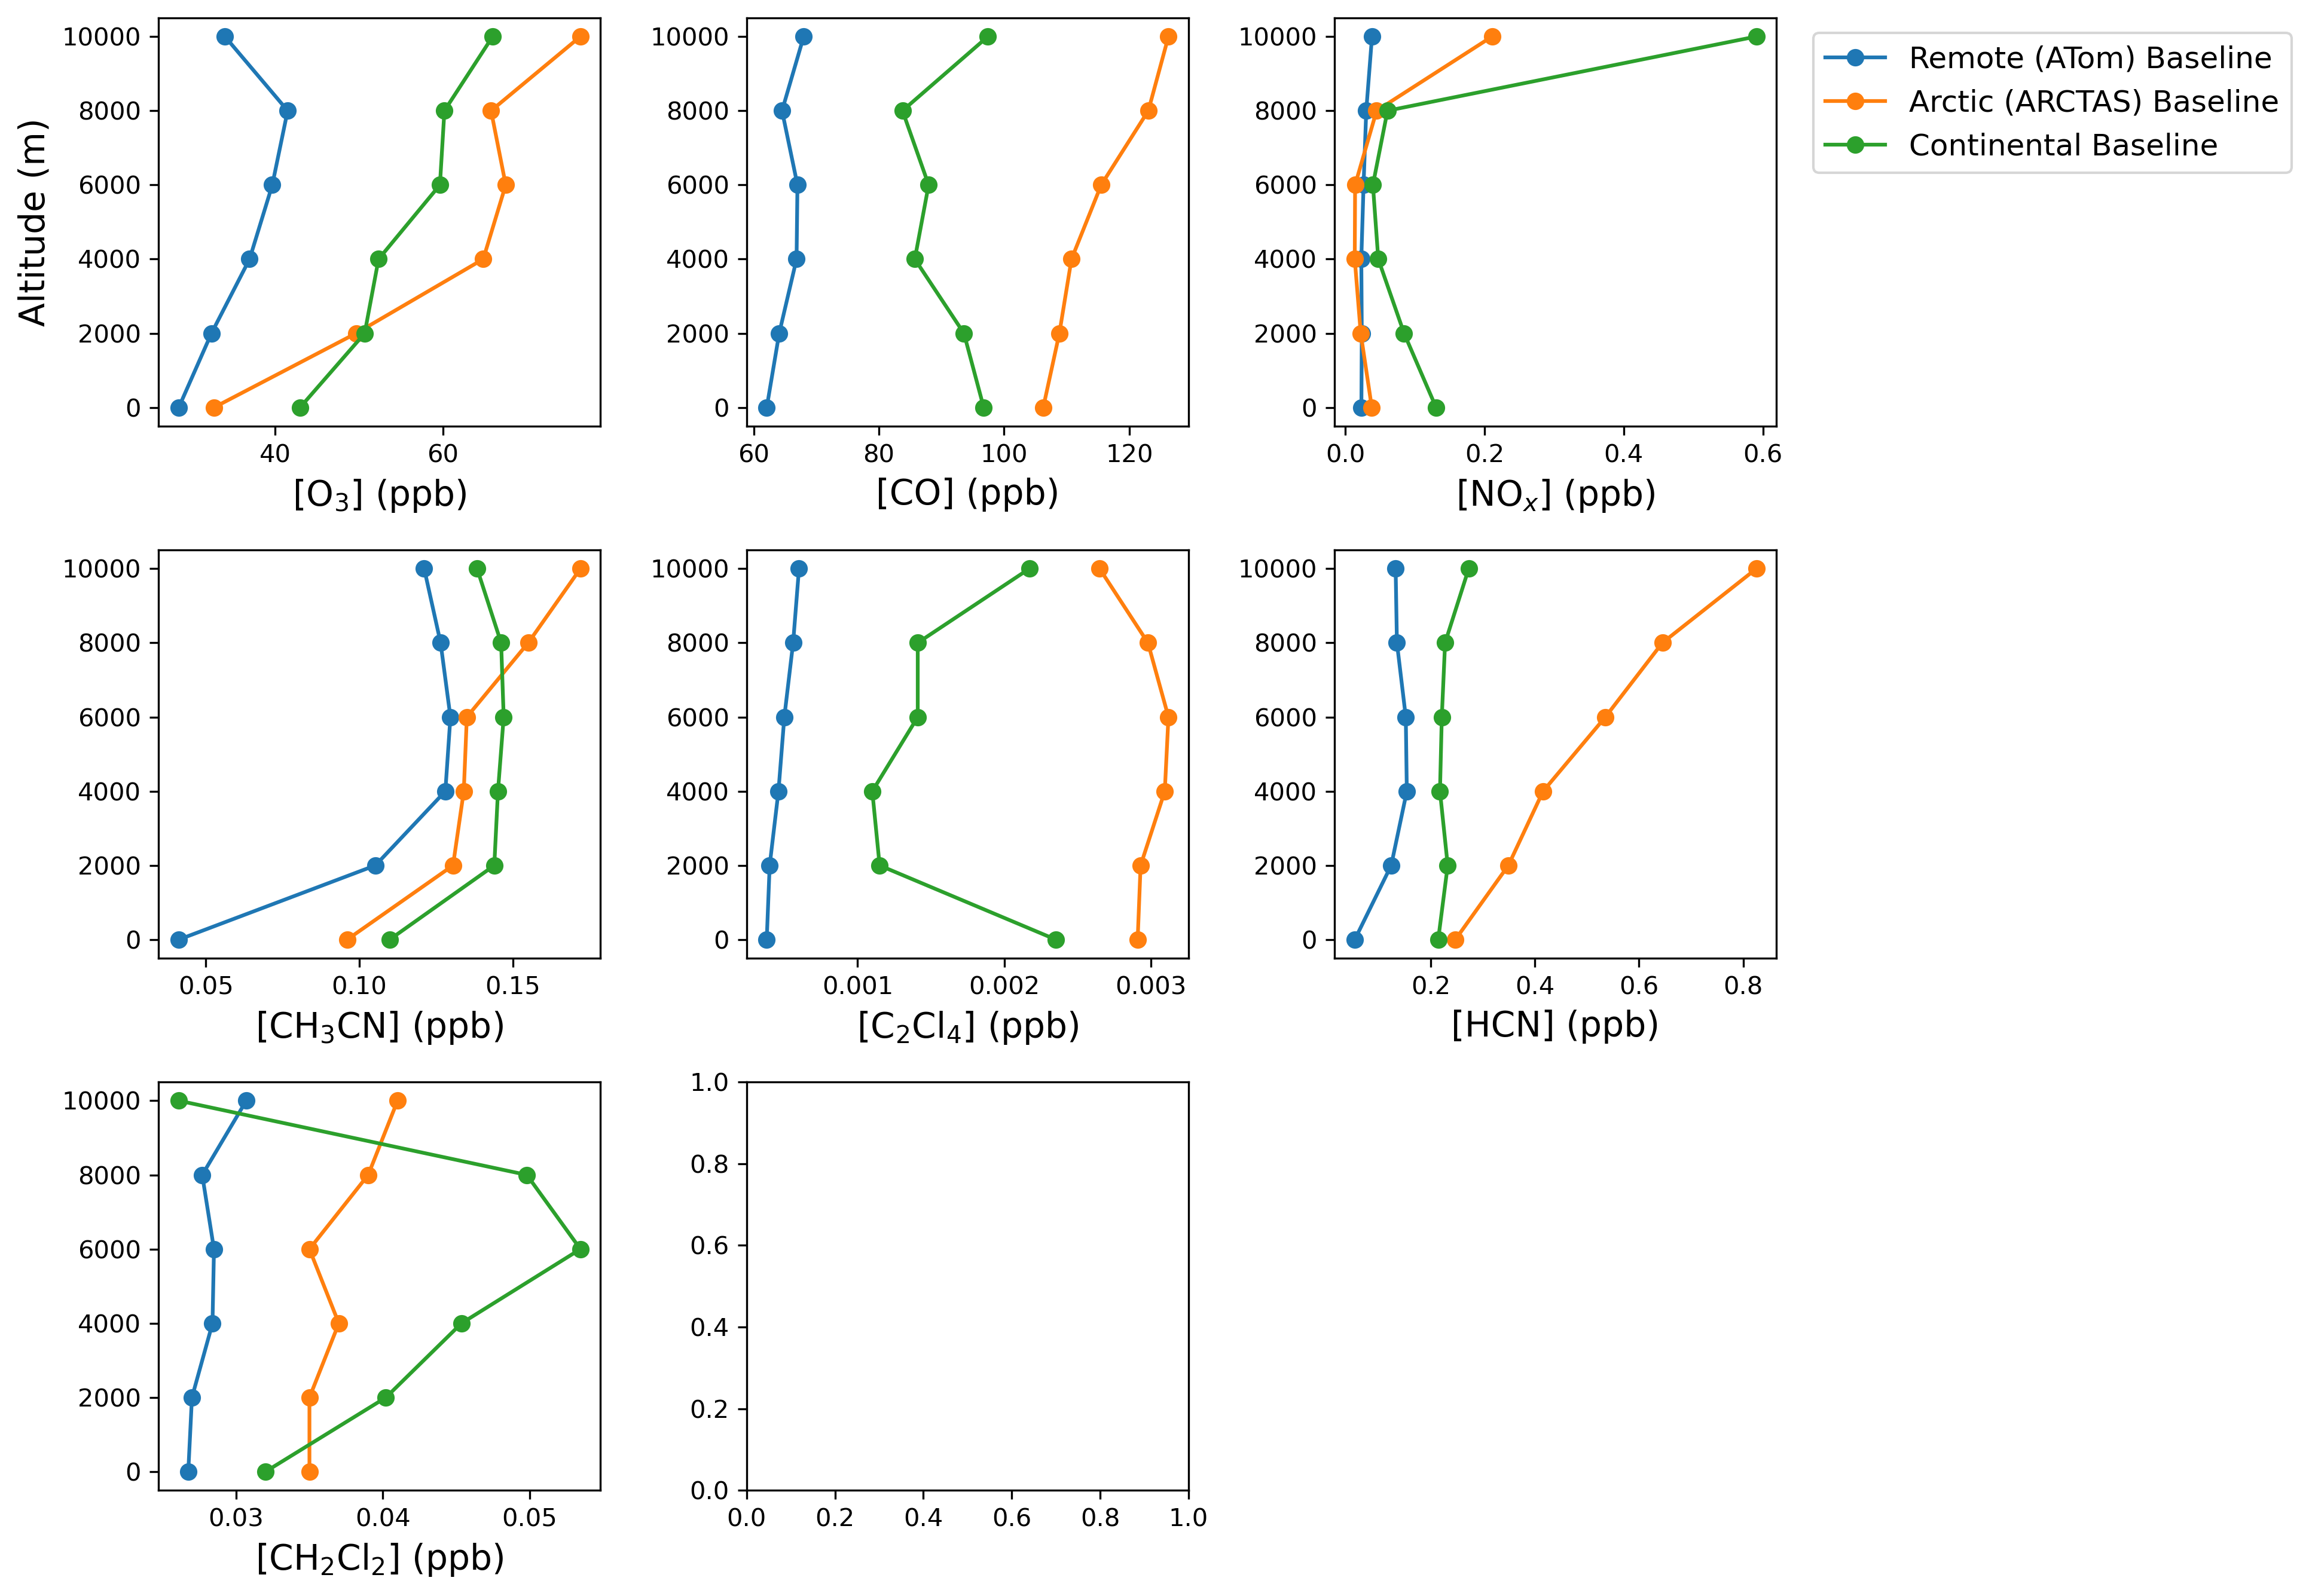

In [151]:
fig, axs = plt.subplots(3, 3, figsize=(13,9), dpi=300)

axs = axs.flatten()
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axs

# O3 plot
ax1.errorbar(atom_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax1.errorbar(arctas_model_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline') 
ax1.errorbar(other_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax1.set_xlabel(r"[O$_3$] (ppb)", fontsize=14)
ax1.set_ylabel(r"Altitude (m)", fontsize=14)

# CO plot 
ax2.errorbar(atom_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax2.errorbar(arctas_model_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax2.errorbar(other_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax2.set_xlabel(r"[CO] (ppb)", fontsize=14)

# NOx plot
ax3.errorbar(atom_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Remote (ATom) Baseline')
ax3.errorbar(arctas_model_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Arctic (ARCTAS) Baseline')
ax3.errorbar(other_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax3.set_xlabel(r"[NO$_x$] (ppb)", fontsize=14)

# CH3CN plot
ax4.errorbar(atom_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax4.errorbar(arctas_model_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax4.errorbar(other_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax4.set_xlabel(r"[CH$_3$CN] (ppb)", fontsize=14)

# C2Cl4 plot
ax5.errorbar(atom_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax5.errorbar(arctas_model_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax5.errorbar(other_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax5.set_xlabel(r"[C$_2$Cl$_4$] (ppb)", fontsize=14)

# HCN plot
ax6.errorbar(atom_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Remote (ATom) Baseline')
ax6.errorbar(arctas_model_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Arctic (ARCTAS) Baseline')
ax6.errorbar(other_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax6.set_xlabel(r"[HCN] (ppb)", fontsize=14)

# CH2Cl2 plot
ax7.errorbar(atom_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax7.errorbar(arctas_model_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax7.errorbar(other_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax7.set_xlabel(r"[CH$_2$Cl$_2$] (ppb)", fontsize=14)

# # sideways barplot with the counts of each altitude range
# ax8.barh(troposphere_alt_ranges-500, atom_count['lat'], height=500, alpha=0.5, label='Remote (ATom)')
# ax8.barh(troposphere_alt_ranges, arctas_count['lat'], height=500, alpha=0.5, label='Arctic (ARCTAS)')
# ax8.barh(troposphere_alt_ranges+500, other_count['lat'], height=500, alpha=0.5, label='Continental')
# ax8.set_xlabel('Count')
# ax8.set_ylabel('Altitude (m)')
# ax8.set_title('Count of clean points')
# ax8.legend()

ax9.remove()


# Add legend to last subplot
ax3.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [145]:
atom_trop_baseline, atom_enhancements_df = o3fire.baseline.subtract_baseline(full_df[full_df['campaign']=='ATom'], method='altitude_dependent', clean_method='percentile', baseline_percentile=0.25, remote=True)
arctas_trop_baseline, arctas_enhancements_df = o3fire.baseline.subtract_baseline((full_df[(full_df['campaign'] == 'ARCTAS')&(full_df['lat'] > 49)]), method='altitude_dependent', clean_method='percentile', baseline_percentile=0.25, arctic=True)
other_trop_baseline, other_enhancements_df = o3fire.baseline.subtract_baseline(full_df[(full_df['campaign']!='ATom')&(full_df['lat'] < 49)], method='altitude_dependent', baseline_percentile=0.25, clean_method='percentile',)

/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trop_baseline = ft_tmp.groupby('alt_range').quantile(baseline_percentile)


/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trop_baseline = ft_tmp.groupby('alt_range').quantile(baseline_percentile)
/net/fs09/d0/jpalmo/Projects/O3Fire/paper/o3fire/baseline.py:60: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trop_baseline = ft_tmp.groupby('alt_range').quantile(baseline_percentile)


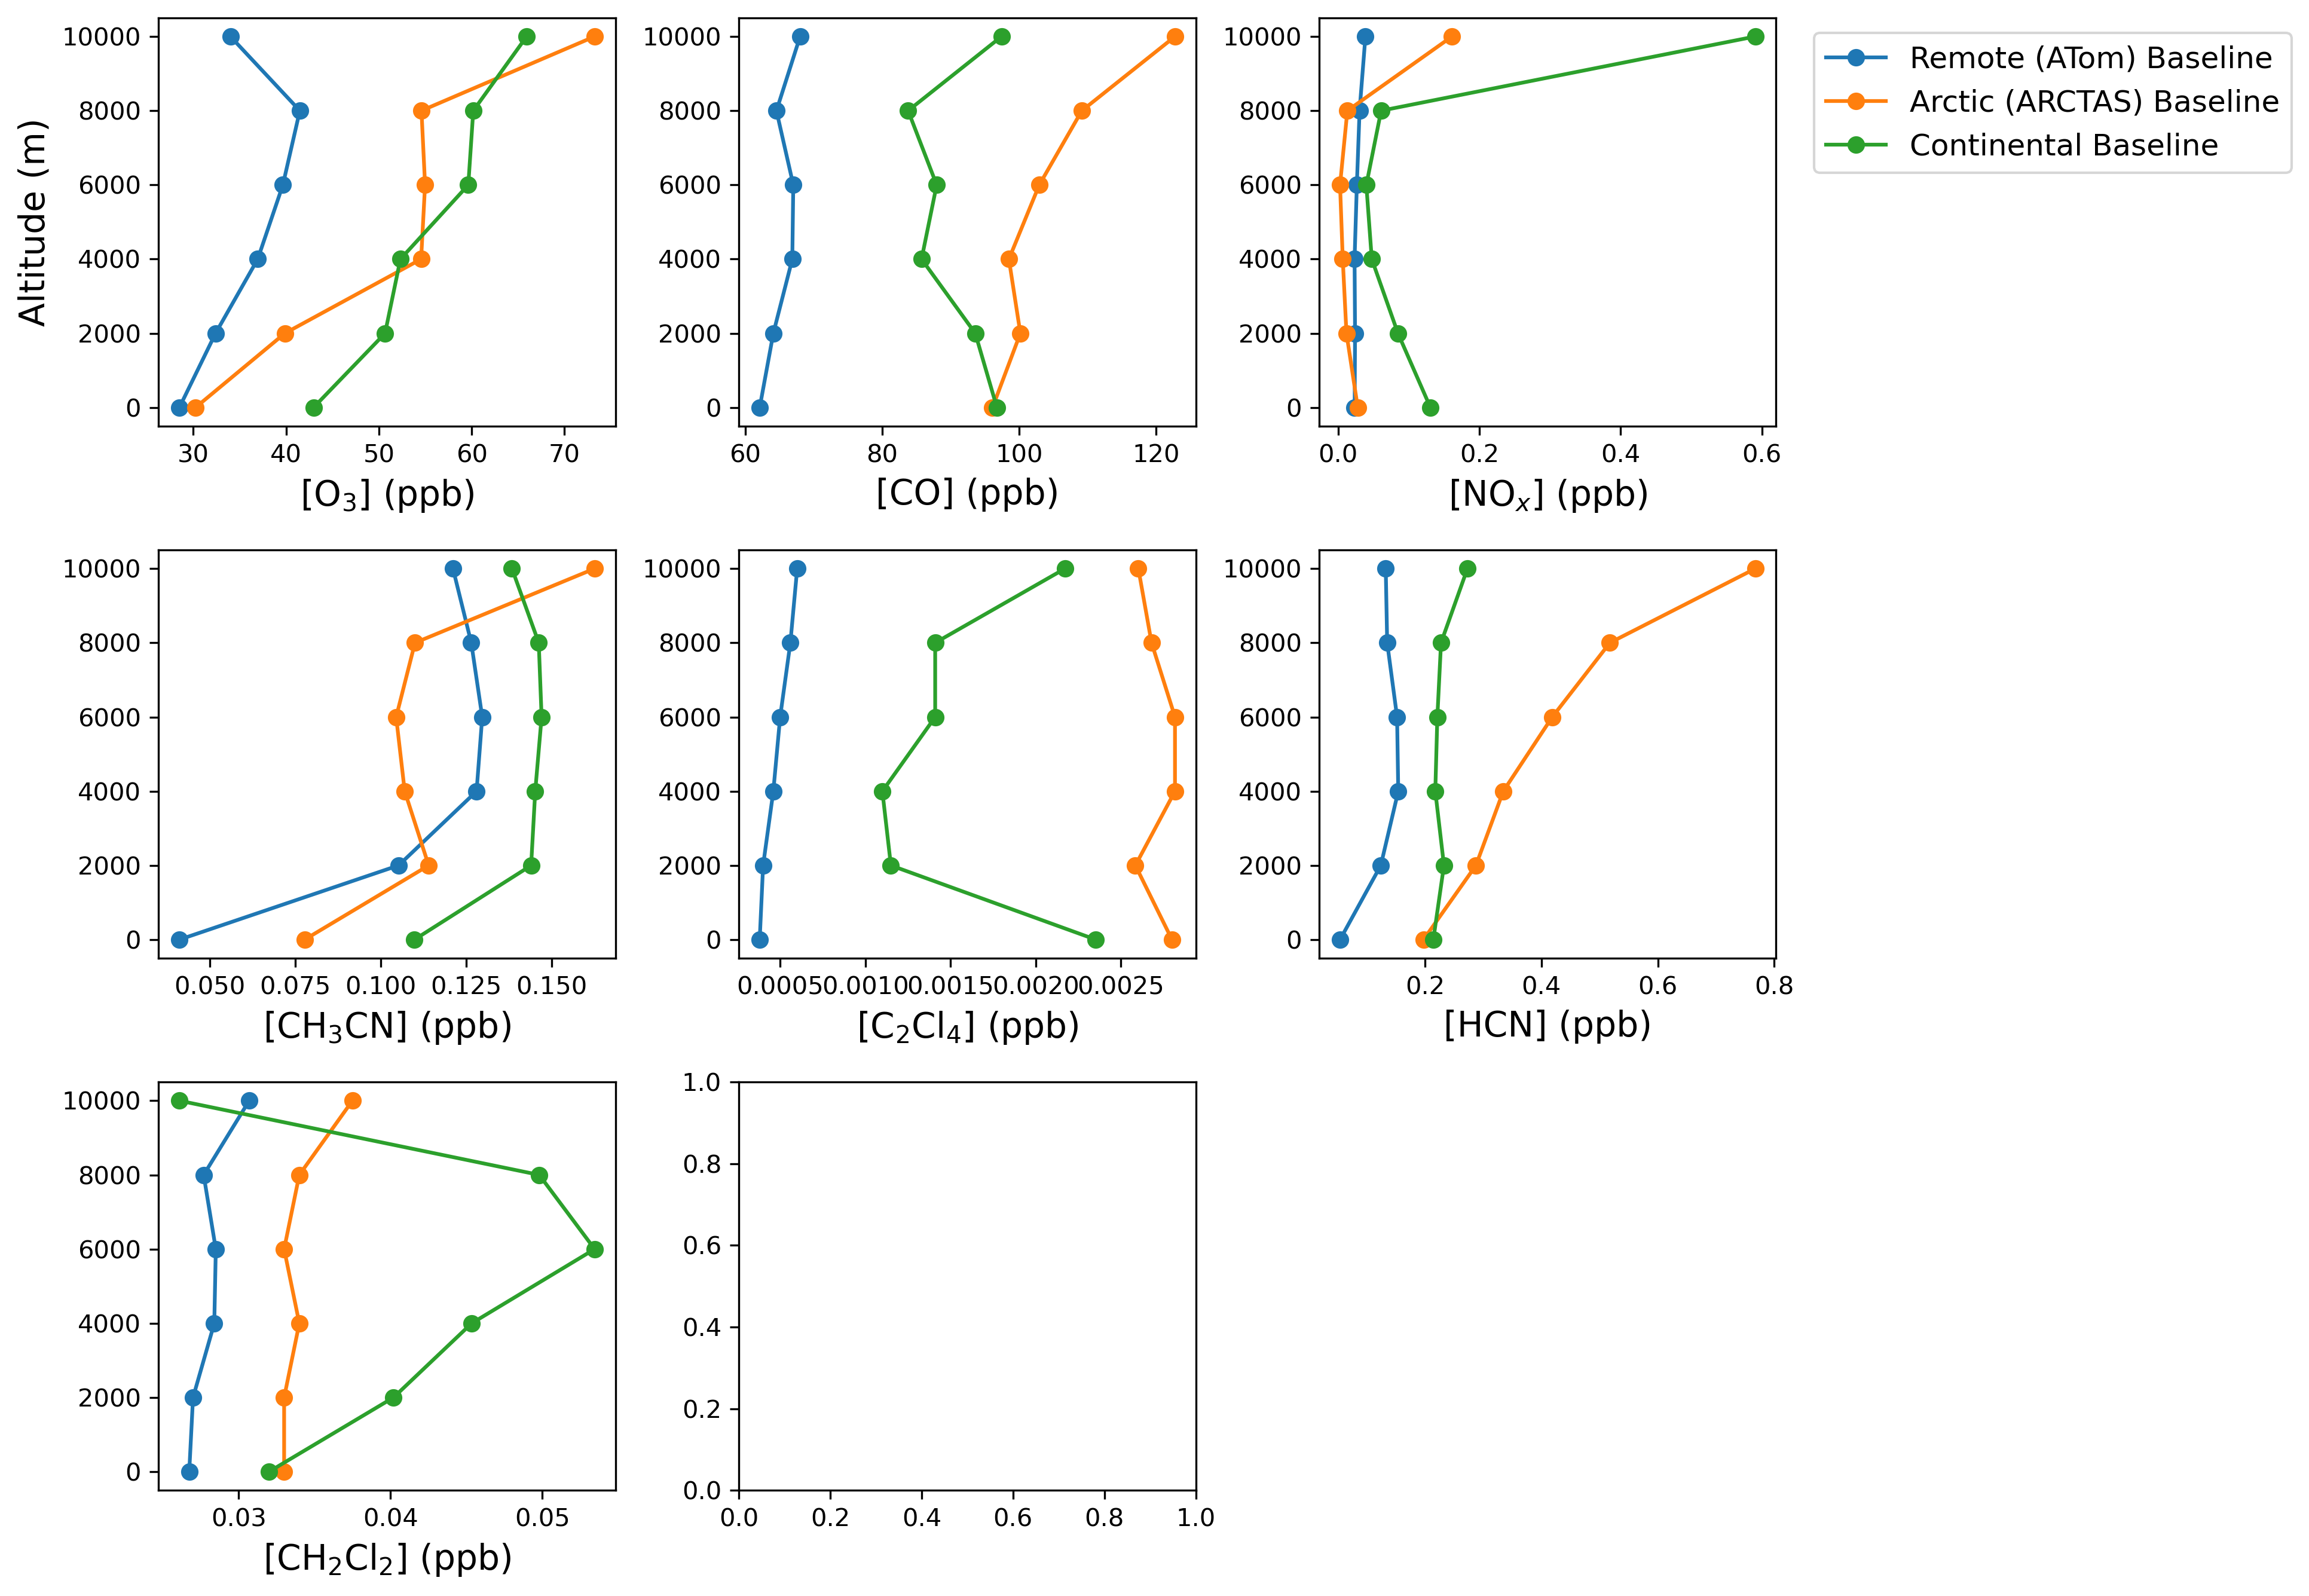

In [149]:
fig, axs = plt.subplots(3, 3, figsize=(13,9), dpi=300)

axs = axs.flatten()
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axs

# O3 plot
ax1.errorbar(atom_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax1.errorbar(arctas_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline') 
ax1.errorbar(other_trop_baseline['O3']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax1.set_xlabel(r"[O$_3$] (ppb)", fontsize=14)
ax1.set_ylabel(r"Altitude (m)", fontsize=14)

# CO plot 
ax2.errorbar(atom_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax2.errorbar(arctas_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax2.errorbar(other_trop_baseline['CO']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax2.set_xlabel(r"[CO] (ppb)", fontsize=14)

# NOx plot
ax3.errorbar(atom_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Remote (ATom) Baseline')
ax3.errorbar(arctas_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Arctic (ARCTAS) Baseline')
ax3.errorbar(other_trop_baseline['NOx']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax3.set_xlabel(r"[NO$_x$] (ppb)", fontsize=14)

# CH3CN plot
ax4.errorbar(atom_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax4.errorbar(arctas_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax4.errorbar(other_trop_baseline['CH3CN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax4.set_xlabel(r"[CH$_3$CN] (ppb)", fontsize=14)

# C2Cl4 plot
ax5.errorbar(atom_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax5.errorbar(arctas_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax5.errorbar(other_trop_baseline['C2Cl4']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax5.set_xlabel(r"[C$_2$Cl$_4$] (ppb)", fontsize=14)

# HCN plot
ax6.errorbar(atom_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Remote (ATom) Baseline')
ax6.errorbar(arctas_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Arctic (ARCTAS) Baseline')
ax6.errorbar(other_trop_baseline['HCN']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax6.set_xlabel(r"[HCN] (ppb)", fontsize=14)

# CH2Cl2 plot
ax7.errorbar(atom_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ATom Baseline')
ax7.errorbar(arctas_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='ARCTAS Baseline')
ax7.errorbar(other_trop_baseline['CH2Cl2']/1000, troposphere_alt_ranges, xerr=None, fmt='o-', label='Continental Baseline')
ax7.set_xlabel(r"[CH$_2$Cl$_2$] (ppb)", fontsize=14)

# # sideways barplot with the counts of each altitude range
# ax8.barh(troposphere_alt_ranges-500, atom_count['lat'], height=500, alpha=0.5, label='Remote (ATom)')
# ax8.barh(troposphere_alt_ranges, arctas_count['lat'], height=500, alpha=0.5, label='Arctic (ARCTAS)')
# ax8.barh(troposphere_alt_ranges+500, other_count['lat'], height=500, alpha=0.5, label='Continental')
# ax8.set_xlabel('Count')
# ax8.set_ylabel('Altitude (m)')
# ax8.set_title('Count of clean points')
# ax8.legend()

ax9.remove()


# Add legend to last subplot
ax3.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()